In [4]:
import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

In [5]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [56]:
df_completo=pd.read_csv("df_completo")
df_muestra=pd.read_csv("muestra.csv")
df_completo = df_completo.iloc[:, 1:]#eliminar la columna de index
df_muestra=df_muestra.iloc[:, 1:]
m_grande=pd.read_csv("muestra_grande")
m_grande=m_grande.iloc[:, 1:]


In [ ]:
df_completo.head()

,id,texto,usuario,hashtags,fecha,retweets,favoritos,texto_limpio,fecha_limpia,zona_horaria,hora,part_of_day
0,12116719578733158,# | Con cañón y coronel El voto a Cabildo Abie...,SemanarioBrecha,"['BrechaAnuario2019', 'RelecturasDeUnAñoPertur...",2021-12-30 15:34:41+00:00,3,2,# | Con cañón y coronel El voto a Cabildo Abie...,2021-12-30 15:34:41,UTC,15,tarde
1,12116547084876964,"# | Las PASO en Argentina ""Empezamos a ver, de...",SemanarioBrecha,['BrechaAnuario2019'],2021-12-30 14:26:08+00:00,2,1,"# | Las PASO en Argentina ""Empezamos a ver, de...",2021-12-30 14:26:08,UTC,14,tarde
2,12116529643744993,# | Bolsonaro contra la selva amazónica En ple...,SemanarioBrecha,['BrechaAnuario2019'],2021-12-30 14:19:12+00:00,3,2,# | Bolsonaro contra la selva amazónica En ple...,2021-12-30 14:19:12,UTC,14,tarde
3,12110290516301292,"# | Aquí, los temas que aparecieron este año y...",SemanarioBrecha,"['BrechaAnuario2019', 'RelecturasDeUnAñoPertur...",2021-12-28 21:00:00+00:00,2,5,"# | Aquí, los temas que aparecieron este año y...",2021-12-28 21:00:00,UTC,21,noche
4,12107119614801142,# | El mejor dibujante de historietas argentin...,SemanarioBrecha,['BrechaAnuario2019'],2021-12-28 00:00:00+00:00,0,4,# | El mejor dibujante de historietas argentin...,2021-12-28 00:00:00,UTC,0,noche


In [22]:
m_grande.columns


Index(['id', 'texto', 'usuario', 'hashtags', 'fecha', 'retweets', 'favoritos',
       'texto_limpio', 'fecha_limpia', 'zona_horaria', 'hora', 'part_of_day'],
      dtype='object')

                 Frecuencia  Porcentaje del total (%)
elpaisuy             109759                 37.769007
ObservadorUY          78446                 26.993937
larepublica_uy        46605                 16.037177
ladiaria              43610                 15.006572
BUSQUEDAonline         8151                  2.804829
SemanarioBrecha        4035                  1.388478


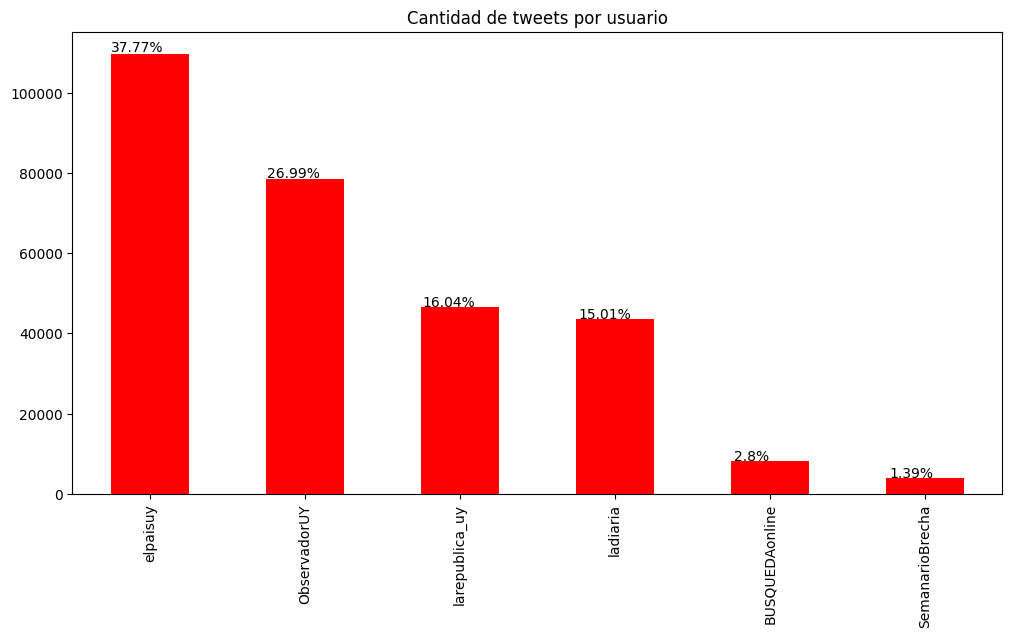

In [60]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculamos la frecuencia de cada usuario
frecuencia = df_completo['usuario'].value_counts()

# Calculamos el porcentaje del total para cada usuario
porcentaje = df_completo['usuario'].value_counts(normalize=True) * 100

# Creamos un nuevo DataFrame con la frecuencia y el porcentaje
df_frec_usur = pd.DataFrame({'Frecuencia': frecuencia, 'Porcentaje del total (%)': porcentaje})

# Mostramos el DataFrame
print(df_frec_usur)

# Creamos la gráfica de barras
ax = df_frec_usur['Frecuencia'].plot(kind='bar', figsize=(12, 6))

# Añadimos el porcentaje del total encima de cada barra
for p in ax.patches:
    ax.annotate(str(round(p.get_height() / df_frec_usur['Frecuencia'].sum() * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

# Añadimos el título a la gráfica
plt.title('Cantidad de tweets por usuario')
# Guardamos la gráfica en un archivo PNG

plt.savefig('grafica1.png')
# Mostramos la gráfica
plt.show()

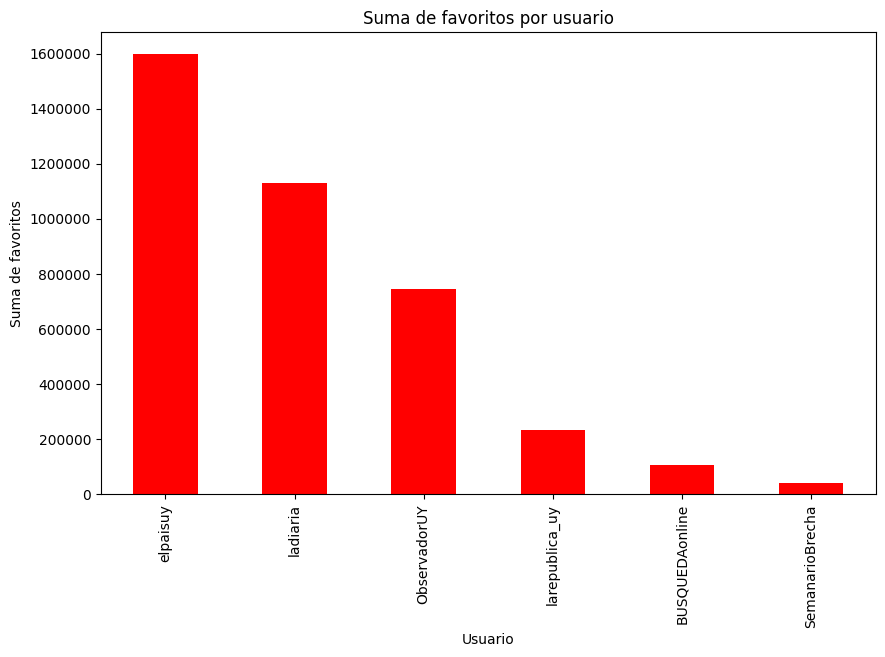

In [61]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Suma de favoritos por usuario
favoritos_por_usuario = df_completo.groupby('usuario')['favoritos'].sum()

# Ordenar de mayor a menor
favoritos_por_usuario = favoritos_por_usuario.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
favoritos_por_usuario.plot(kind='bar')
plt.title('Suma de favoritos por usuario')
plt.xlabel('Usuario')
plt.ylabel('Suma de favoritos')



# Evitar notación científica
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.savefig('grafica2.png')


plt.show()



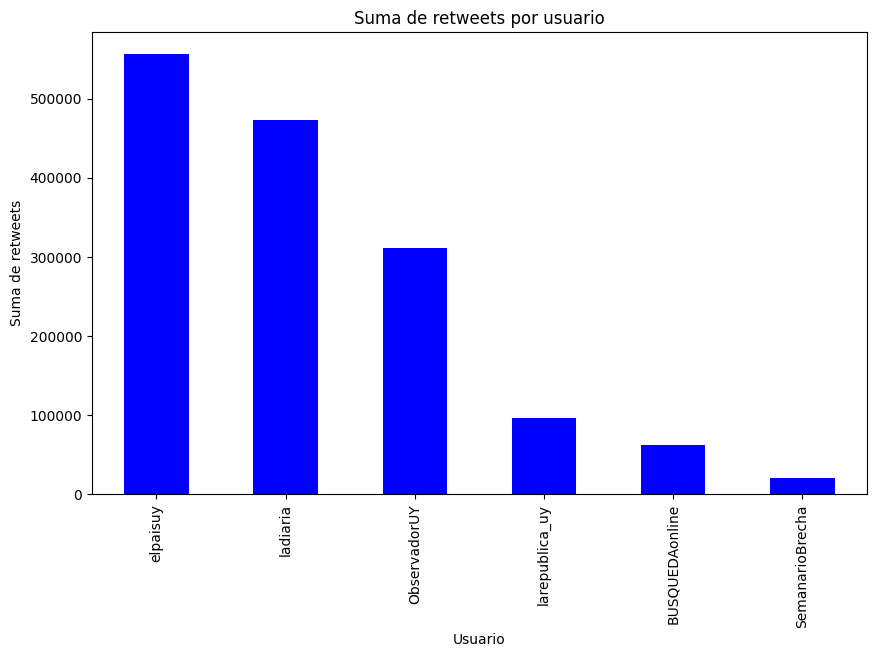

In [62]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Suma de favoritos por usuario
rt_por_usuario = df_completo.groupby('usuario')['retweets'].sum()

# Ordenar de mayor a menor
rt_por_usuario = rt_por_usuario.sort_values(ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
rt_por_usuario.plot(kind='bar', color='blue')  # Aquí se cambia el color a azul turquesa
plt.title('Suma de retweets por usuario')
plt.xlabel('Usuario')
plt.ylabel('Suma de retweets')

# Evitar notación científica
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.savefig('grafica3.png')


plt.show()

In [63]:
frec_ht=pd.read_csv("frec_ht")
frec_ht = frec_ht.iloc[:, 1:]
frec_ht.sort_values('Frecuencia', ascending=False).head(10)

,Elemento,Frecuencia
2487,LaDiariaFinDeSemana,5733
2478,postura,2697
2480,LaDiariaEducación,2014
2485,LaDiariaTrabajo,1847
2481,LaDiariaSalud,1660
1315,Ahora,1371
2479,LaDiariaFeminismos,1339
211,CoronavirusEnUruguay,1164
2512,LaDiariaJusticia,1120
2483,LaDiariaCiencia,1031


In [65]:
import pandas as pd

# Supongamos que tu DataFrame se llama df y las columnas se llaman 'hashtags' y 'part_of_day'
# Primero, vamos a separar los hashtags y expandirlos en filas separadas
df_expanded = df_completo.assign(hashtags=df_completo['hashtags'].str.split(',')).explode('hashtags')

# Luego, calculamos la frecuencia de cada hashtag en cada parte del día
df_summary = df_expanded.groupby(['hashtags', 'part_of_day']).size().reset_index(name='frecuencia')

# Finalmente, ordenamos el DataFrame por frecuencia en orden descendente
df_summary = df_summary.sort_values('frecuencia', ascending=False)


In [67]:
df_summary.head(10)
#df_summary.to_csv("ht_part_day")


,hashtags,part_of_day,frecuencia
5924,[],tarde,104977
5923,[],noche,87562
5922,[],mañana,58396
3882,['LaDiariaFinDeSemana'],tarde,1802
3881,['LaDiariaFinDeSemana'],noche,1368
5861,['postura'],noche,1055
5862,['postura'],tarde,996
863,'LaDiariaFinDeSemana'],tarde,901
3914,['LaDiariaTrabajo'],tarde,832
3880,['LaDiariaFinDeSemana'],mañana,759


In [68]:
# Filtramos los hashtags vacíos que son solo corchetes
df_summary = df_summary[df_summary['hashtags'] != '[]']

# Obtenemos los primeros 10 hashtags más frecuentes para cada parte del día
df_top10 = df_summary.groupby('part_of_day').apply(lambda x: x.nlargest(10, 'frecuencia')).reset_index(drop=True)

# Luego, pivotamos el DataFrame para tener una columna para cada parte del día
df_pivot = df_top10.pivot(index='hashtags', columns='part_of_day', values='frecuencia')

# Rellenamos los valores NaN con 0
df_pivot = df_pivot.fillna(0)


In [69]:
df_pivot

part_of_day,mañana,noche,tarde
hashtags,,,
'LaDiariaFinDeSemana'],218.0,664.0,901.0
'Noticias'],348.0,0.0,0.0
',175.0,0.0,0.0
'],209.0,549.0,581.0
['Ahora'],0.0,693.0,507.0
['ApuntesDelDía'],363.0,0.0,0.0
['CoronavirusEnUruguay'],0.0,601.0,0.0
['LaDiariaEducación'],0.0,747.0,729.0
['LaDiariaFeminismos'],0.0,518.0,549.0


In [70]:
df_pivot.to_csv("top_part_day")

In [81]:
import pandas as pd
from nltk.corpus import stopwords
from collections import Counter

import pandas as pd
from nltk.corpus import stopwords
from collections import Counter

# Asegúrate de tener las stopwords en español descargadas
nltk.download('stopwords')

# Supongamos que df es tu DataFrame y 'texto_limpio' es tu columna de interés
texto_pal = df_completo['texto_limpio'].str.cat(sep=' ')

# Crear lista de stopwords en español
stopwords_es = set(stopwords.words('spanish'))

# Agregar palabras adicionales a remover
palabras_a_remover = ['elobservador.com.uy', 'El', 'La',"Los", '#',
                      'dijo', 'un', 'tras', 'nuevo', 'los',"ladiaria.com.uy","dos"
                      ,"   ladiaria.com.uy ","elpais.com.uy","En","Ser",
                      "casos","Las","año","Un","Pou","ser","años","|"]
stopwords_es.update(palabras_a_remover)

# Eliminar stopwords y calcular frecuencia de palabras
palabras = [palabra.strip() for palabra in texto_pal.split() if palabra not in stopwords_es]
frecuencia = Counter(palabras)

# Crear DataFrame con las 20 palabras más comunes
df_resumen = pd.DataFrame(frecuencia.most_common(20), columns=['Palabra', 'Frecuencia'])

print(df_resumen)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                   Palabra  Frecuencia
0                  Uruguay       22780
1                 gobierno       17073
2                  Lacalle       15606
3               presidente       15585
4              coronavirus       13873
5                 personas       12932
6                 Nacional       12029
7                       Se       10360
8               Montevideo       10198
9            tvshow.com.uy       10094
10                    país       10057
11  negocios.elpais.com.uy        9281
12                millones        9074
13            suscriptores        8975
14                pandemia        8860
15                    tres        8765
16                    cómo        8495
17                   nueva        8478
18                 primera        8365
19                      si        8285


In [82]:
df_resumen.to_csv("palabras_frec")

Se analizan sentimientos en Español, sin embargo no se obtienen resultados convincentes debido a que el algoritmo funciona mejor en inglés

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Descargar el lexicon de Vader
nltk.download('vader_lexicon')

# Crear el analizador de sentimientos
sia = SentimentIntensityAnalyzer()



# Aplicar el analizador de sentimientos a cada texto
df_muestra['sentimiento'] = df_muestra['texto_limpio'].apply(lambda texto_limpio: sia.polarity_scores(str(texto_limpio)))

# Crear una columna con la clasificación del sentimiento
df_muestra['clasificacion'] = df_muestra['sentimiento'].apply(lambda sentimiento: 'positivo' if sentimiento['compound'] > 0 else ('neutral' if sentimiento['compound'] == 0 else 'negativo'))

print(df_muestra[['texto_limpio', 'clasificacion']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                          texto_limpio clasificacion
0    Policía Científica lo analiza ahora para deter...       neutral
1    Este miércoles en El Poder de la Palabra  Fern...       neutral
2    Los comentarios sobre un Valverde pletórico y ...       neutral
3    El gobierno uruguayo se ofrece como “canal de ...       neutral
4    Después de un altercado entre vecinos falleció...       neutral
..                                                 ...           ...
379  # La Dinama habilitó la construcción del Ferro...       neutral
380  Alemania: avance de los “antimascarillas” Alem...       neutral
381                             Nuestra portada de hoy       neutral
382  La preocupación mundial por el cambio climátic...       neutral
383  Murales en la calle: inaugura "Si estas parede...       neutral

[384 rows x 2 columns]


<Axes: xlabel='clasificacion', ylabel='count'>

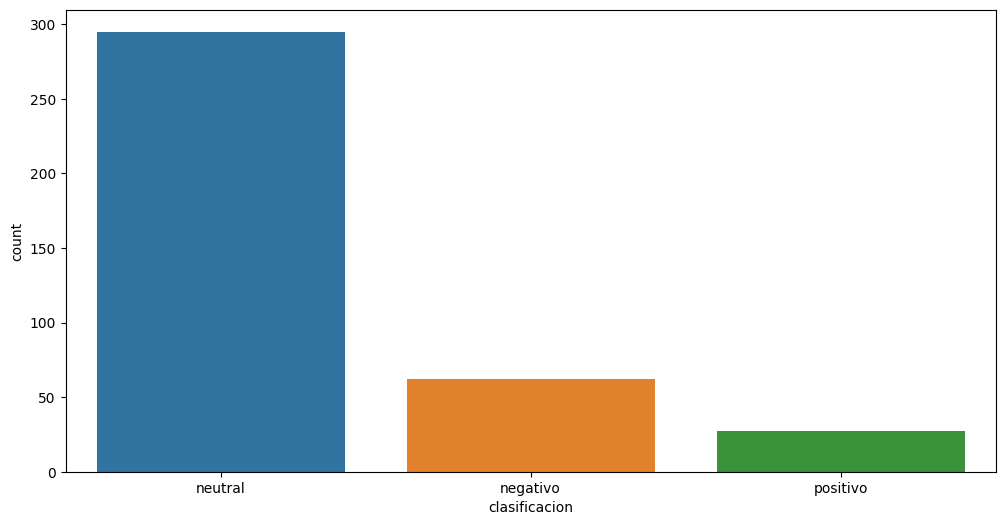

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='clasificacion',data=df_muestra)

In [19]:
pip install textblob

In [ ]:
df_muestra.dtypes


id                int64
texto            object
usuario          object
hashtags         object
fecha            object
retweets          int64
favoritos         int64
texto_limpio     object
fecha_limpia     object
zona_horaria     object
hora              int64
part_of_day      object
sentimiento      object
clasificacion    object
dtype: object

In [85]:
import pandas as pd
from textblob import TextBlob

# Crear un dataframe de ejemplo

# Función para traducir el texto al inglés
def traducir(texto):
    return str(TextBlob(texto).translate(from_lang="es",to='en'))

# Aplicar la función a la columna 'Texto' y guardar los resultados en la columna 'Texto_en'
df_muestra['ingles'] = df_muestra['texto_limpio'].apply(traducir)

print(df_muestra)


                    id                                              texto  \
0      138749016585419  Policía Científica lo analiza ahora para deter...   
1     1335939974584279  Este miércoles en El Poder de la Palabra  Fern...   
2     1207621206922412  Los comentarios sobre un Valverde pletórico y ...   
3     1088572208367186  El gobierno uruguayo se ofrece como “canal de ...   
4    13221980870294487  Después de un altercado entre vecinos falleció...   
..                 ...                                                ...   
379   1108106181518807  # La Dinama habilitó la construcción del Ferro...   
380  13004860702667366  Alemania: avance de los “antimascarillas” Alem...   
381  13007426971587666                             Nuestra portada de hoy   
382  11247981041491558  La preocupación mundial por el cambio climátic...   
383  11551206565409792  Murales en la calle: inaugura "Si estas parede...   

            usuario                 hashtags                      fecha  \


In [ ]:
df_muestra.head(3)

,id,texto,usuario,hashtags,fecha,retweets,favoritos,texto_limpio,fecha_limpia,zona_horaria,hora,part_of_day,sentimiento,clasificacion,ingles,senti_en,clas_en,partes_del_dia_num,sentimientos_num,usuario_num
0,138749016585419,Policía Científica lo analiza ahora para deter...,elpaisuy,[],2023-04-28 19:33:28+00:00,0,1,Policía Científica lo analiza ahora para deter...,2023-04-28 19:33:28,UTC,19,noche,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,Scientific police now analyzes it to determine...,"{'neg': 0.034, 'neu': 0.966, 'pos': 0.0, 'comp...",negativo,3,-1,0
1,1335939974584279,Este miércoles en El Poder de la Palabra Fern...,larepublica_uy,[],2022-12-07 13:31:25+00:00,1,1,Este miércoles en El Poder de la Palabra Fern...,2022-12-07 13:31:25,UTC,13,tarde,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,This Wednesday in the power of the word Fernan...,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",positivo,2,1,1
2,1207621206922412,Los comentarios sobre un Valverde pletórico y ...,elpaisuy,[],2021-12-19 11:18:26+00:00,1,5,Los comentarios sobre un Valverde pletórico y ...,2021-12-19 11:18:26,UTC,11,mañana,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral,The comments on a plethoric valverde and a com...,"{'neg': 0.048, 'neu': 0.952, 'pos': 0.0, 'comp...",negativo,1,-1,0


Clasificación de sentimientos al traducirlos al idioma inglés



In [86]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Descargar el lexicon de Vader
nltk.download('vader_lexicon')

# Crear el analizador de sentimientos
sia = SentimentIntensityAnalyzer()



# Aplicar el analizador de sentimientos a cada texto
df_muestra['senti_en'] = df_muestra['ingles'].apply(lambda ingles: sia.polarity_scores(str(ingles)))

# Crear una columna con la clasificación del sentimiento
df_muestra['clas_en'] = df_muestra['senti_en'].apply(lambda sentimiento: 'positivo' if sentimiento['compound'] > 0 else ('neutral' if sentimiento['compound'] == 0 else 'negativo'))

print(df_muestra[['ingles', 'clas_en']])

                                                ingles   clas_en
0    Scientific police now analyzes it to determine...  negativo
1    This Wednesday in the power of the word Fernan...  positivo
2    The comments on a plethoric valverde and a com...  negativo
3    The Uruguayan government is offered as a “dial...  negativo
4    After an altercation among neighbors, a man di...  negativo
..                                                 ...       ...
379  # Dinama enabled the construction of the centr...   neutral
380  Germany: Advance of the "Antimascarillas" Germ...  negativo
381                                    Our cover today   neutral
382  The worldwide concern for climate change is su...   neutral
383  Murals on the street: opens "If these walls wi...   neutral

[384 rows x 2 columns]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


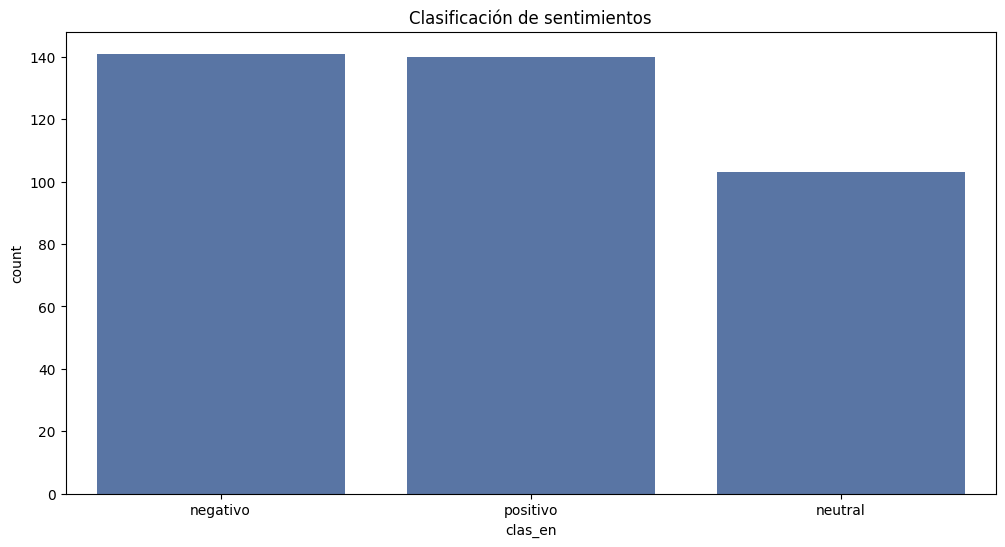

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette to "pastel"
sns.set_palette('deep')

plt.figure(figsize=(12,6))
sns.countplot(x='clas_en', data=df_muestra)
plt.title("Clasificación de sentimientos")
plt.savefig("clas_en")


In [88]:
tabla_frecuencias = pd.crosstab(index=df_muestra['clas_en'], columns=df_muestra['usuario'])

print(tabla_frecuencias)

usuario   BUSQUEDAonline  ObservadorUY  SemanarioBrecha  elpaisuy  ladiaria  \
clas_en                                                                       
negativo               8            29                2        55        28   
neutral                3            24                2        29        22   
positivo               3            45                1        57        18   

usuario   larepublica_uy  
clas_en                   
negativo              19  
neutral               23  
positivo              16  


In [89]:
tabla_frecuencias = pd.crosstab(index=df_muestra['usuario'], columns=df_muestra['clas_en'])

print(tabla_frecuencias)

clas_en          negativo  neutral  positivo
usuario                                     
BUSQUEDAonline          8        3         3
ObservadorUY           29       24        45
SemanarioBrecha         2        2         1
elpaisuy               55       29        57
ladiaria               28       22        18
larepublica_uy         19       23        16


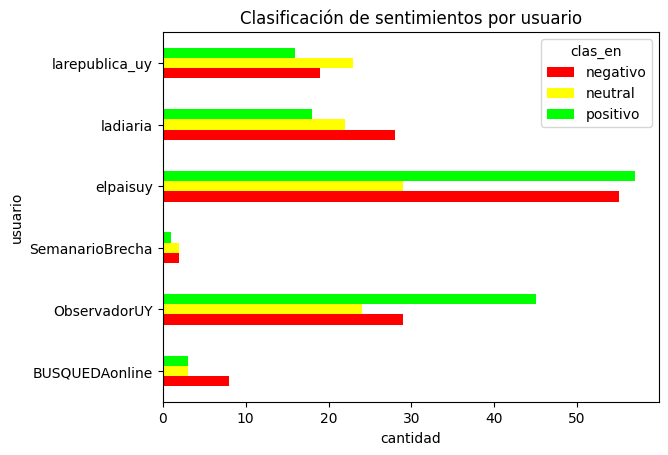

In [98]:
# Define una paleta de colores semáforo más atractiva
colores_semaforo = ["#FF0000", "#FFFF00", "#00FF00"]

# Establece la paleta de colores en seaborn
sns.set_palette(sns.color_palette(colores_semaforo))

sns.set_palette(sns.color_palette(colores_semaforo))
tabla_frecuencias.plot(kind='barh', stacked=False)

plt.title('Clasificación de sentimientos por usuario')
plt.xlabel('cantidad')
plt.ylabel('usuario')
plt.savefig("Clas_usuario")
plt.show()

In [ ]:
df_muestra.to_csv("df_muestra")

In [96]:
dia_sentimiento = pd.crosstab(index=df_muestra['part_of_day'], columns=df_muestra['clas_en'])

print(dia_sentimiento)

clas_en      negativo  neutral  positivo
part_of_day                             
mañana             35       32        32
noche              44       39        53
tarde              62       32        55


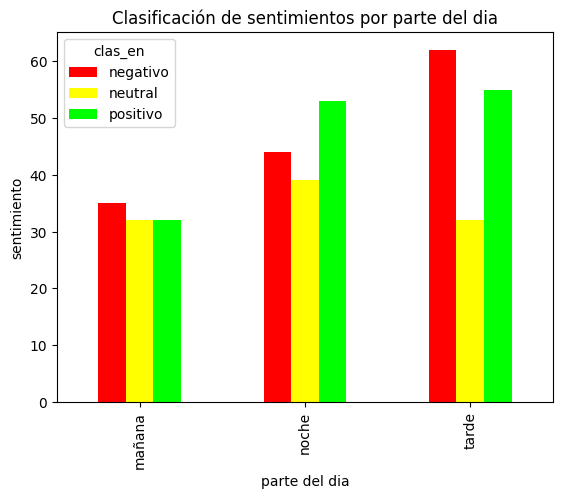

In [100]:
dia_sentimiento.plot(kind='bar', stacked=False)

plt.title('Clasificación de sentimientos por parte del dia')
plt.xlabel('parte del dia')
plt.ylabel('sentimiento')
plt.savefig("sent_part_day")
plt.show()

In [ ]:
senti_hora = pd.crosstab(index=df_muestra['hora'], columns=df_muestra['clas_en'])

print(senti_hora)

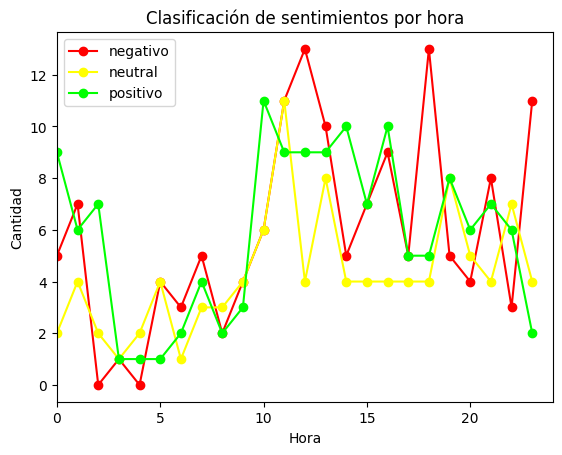

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'senti_hora' es tu DataFrame y que 'clas_en' son tus tres categorías
for categoria in senti_hora.columns:
    plt.plot(senti_hora.index, senti_hora[categoria], marker='o', label=categoria)

plt.title('Clasificación de sentimientos por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad')

# Ajusta los límites del eje x para incluir todas las horas del día
plt.xlim([0, 24])

plt.legend()
plt.savefig("Clas_hr")
plt.show()


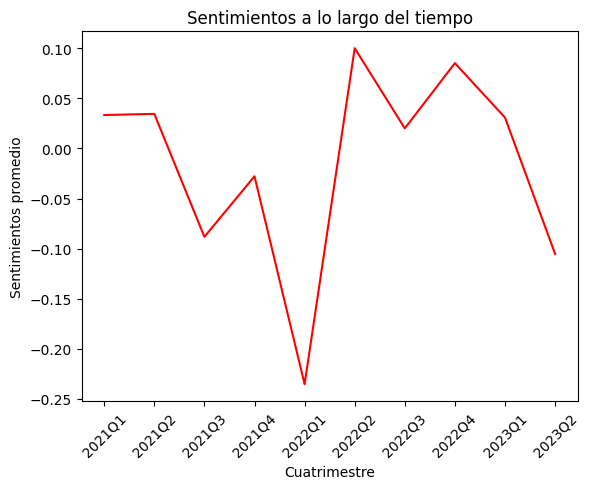

In [107]:
# Convertimos 'fecha' a datetime si aún no lo es
df_muestra['fecha'] = pd.to_datetime(df_muestra['fecha'])

# Creamos una nueva columna para el cuatrimestre
df_muestra['cuatrimestre'] = df_muestra['fecha'].dt.to_period('Q')

# Agrupamos por cuatrimestre y calculamos la media de los sentimientos
df_agrupado = df_muestra.groupby('cuatrimestre').mean()

# Ahora, hacemos un gráfico de línea de los sentimientos a lo largo del tiempo
plt.plot(df_agrupado.index.astype(str), df_agrupado['sentimientos_num'])

plt.xlabel('Cuatrimestre')
plt.ylabel('Sentimientos promedio')
plt.title('Sentimientos a lo largo del tiempo')
plt.xticks(rotation=45)
plt.savefig("Sent_time")

plt.show()

In [108]:
Positive_sent = df_muestra[df_muestra['clas_en']=='positivo']
Negative_sent = df_muestra[df_muestra['clas_en']=='negativo']
Neutral_sent = df_muestra[df_muestra['clas_en']=='neutral']

In [ ]:

# Asumiendo que 'Positive_sent' es un DataFrame y 'texto_limpio' es una columna de texto
top = Counter(word for line in Positive_sent['texto_limpio'] for word in line.split() if word not in stop_words)
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Common_words,count
0,El,54
1,elpais.com.uy,36
2,La,32
3,elobservador.com.uy,25
4,#,16
5,dijo,16
6,ladiaria.com.uy,13
7,acuerdo,13
8,gobierno,13
9,suscriptores,12


In [125]:
import nltk
from nltk.corpus import stopwords
from collections import Counter



# Añade tus propias stopwords

#stopwords_es.extend(palabras_a_remover)

# Define una función para eliminar las stopwords
def eliminar_stopwords(texto, stopwords):
    return ' '.join([palabra for palabra in texto.split() if palabra not in stopwords])

# Aplica la función a la columna 'texto_limpio' de tu DataFrame
Positive_sent['texto_limpio'] = Positive_sent['texto_limpio'].apply(lambda x: eliminar_stopwords(x, stopwords_es))

# Ahora puedes contar las palabras más comunes sin las stopwords
top = Counter(word for line in Positive_sent['texto_limpio'] for word in line.split())
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')
#temp_positive.to_csv("c_positive")

,Common_words,count
0,acuerdo,13
1,gobierno,13
2,suscriptores,12
3,US$,12
4,Frente,11
5,Member.,11
6,Lacalle,11
7,si,10
8,Nota,10
9,exclusiva,10


In [121]:
# Aplica la función a la columna 'texto_limpio' de tu DataFrame
Negative_sent['texto_limpio'] = Negative_sent['texto_limpio'].apply(lambda x: eliminar_stopwords(x, stopwords_es))

# Ahora puedes contar las palabras más comunes sin las stopwords
top = Counter(word for line in Negative_sent['texto_limpio'] for word in line.split())
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')
#temp_negative.to_csv("c_negative")


,Common_words,count
0,gobierno,13
1,ministro,12
2,va,10
3,Interior,10
4,Lacalle,9
5,Ministerio,9
6,dice,9
7,cinco,8
8,personas,8
9,meses,8


In [123]:
# Aplica la función a la columna 'texto_limpio' de tu DataFrame
Neutral_sent['texto_limpio'] = Neutral_sent['texto_limpio'].apply(lambda x: eliminar_stopwords(x, stopwords_es))

# Ahora puedes contar las palabras más comunes sin las stopwords
top = Counter(word for line in Neutral_sent['texto_limpio'] for word in line.split())
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='PuRd')
#temp_neutral.to_csv("c_neutral")

,Common_words,count
0,varios,10
1,primer,8
2,hoy,7
3,País,7
4,cómo,7
5,tres,6
6,portada,5
7,colección,5
8,libro,5
9,Este,5


In [126]:
df_nube=df_muestra.copy()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


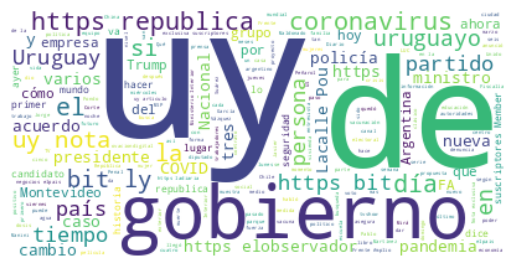

In [131]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargar la lista de stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Definir las stopwords en español
stop_words = set(stopwords.words('spanish'))
#stop_words.update(palabras_a_remover)


# Función para eliminar stopwords de un tweet
def remove_stopwords(tweet):
    word_tokens = word_tokenize(tweet)
    filtered_tweet = [word for word in word_tokens if word.casefold() not in stop_words]
    return ' '.join(filtered_tweet)

# Aplicar la función a cada tweet
df_nube['texto_limpio']= df_nube['texto_limpio'].apply(remove_stopwords)

# Concatenar todos los tweets en una sola cadena de texto
text = ' '.join(tweet for tweet in df_nube['texto_limpio'])

# Generar la nube de palabras
wordcloud = WordCloud(background_color='white').generate(text)

# Mostrar la nube de palabras
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("nube2")
plt.show()


La correlación es:
                    partes_del_dia_num  sentimientos_num
partes_del_dia_num            1.000000          0.047434
sentimientos_num              0.047434          1.000000


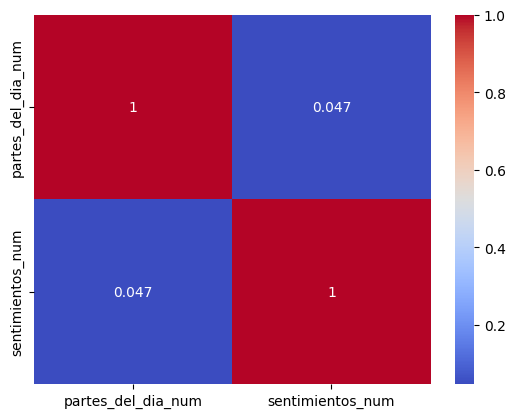

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tus datos están en un DataFrame de pandas llamado df
# y las columnas se llaman 'partes_del_dia' y 'sentimientos'

# Primero, necesitamos convertir las variables categóricas a numéricas para calcular la correlación
df_muestra['partes_del_dia_num'] = df_muestra['part_of_day'].replace({'mañana': 1, 'tarde': 2, 'noche': 3})
df_muestra['sentimientos_num'] = df_muestra['clas_en'].replace({'positivo': 1, 'neutral': 0, 'negativo': -1})

# Ahora, calculamos la correlación
correlacion = df_muestra[['partes_del_dia_num', 'sentimientos_num']].corr()

print('La correlación es:')
print(correlacion)

# Para visualizar la correlación, podemos usar un mapa de calor
sns.heatmap(correlacion, annot=True, cmap='coolwarm')

plt.show()


La correlación es:
                      hora  sentimientos_num
hora              1.000000         -0.072809
sentimientos_num -0.072809          1.000000


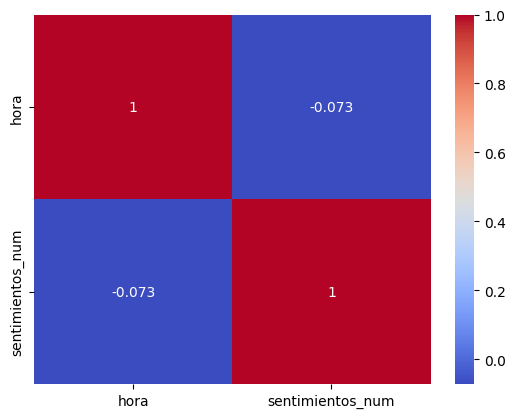

In [ ]:

# Ahora, calculamos la correlación
correlacion2 = df_muestra[['hora', 'sentimientos_num']].corr()

print('La correlación es:')
print(correlacion2)

# Para visualizar la correlación, podemos usar un mapa de calor
sns.heatmap(correlacion2, annot=True, cmap='coolwarm')

plt.show()

La correlación es:
                  usuario_num  sentimientos_num
usuario_num          1.000000          0.028038
sentimientos_num     0.028038          1.000000


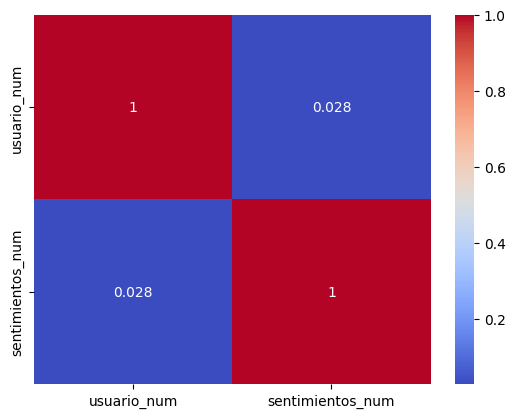

In [ ]:

# Usamos factorize para convertir 'cuenta' a numérico
df_muestra['usuario_num'] = pd.factorize(df_muestra['usuario'])[0]

# Ahora, calculamos la correlación
correlacion3 = df_muestra[['usuario_num', 'sentimientos_num']].corr()

print('La correlación es:')
print(correlacion3)

# Para visualizar la correlación, podemos usar un mapa de calor
sns.heatmap(correlacion3, annot=True, cmap='coolwarm')

plt.show()


La correlación es:
                  retweets  sentimientos_num
retweets          1.000000         -0.065055
sentimientos_num -0.065055          1.000000


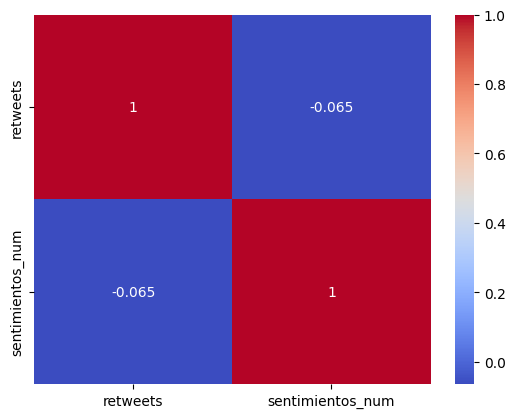

In [ ]:
correlacion4 = df_muestra[['retweets', 'sentimientos_num']].corr()

print('La correlación es:')
print(correlacion4)

# Para visualizar la correlación, podemos usar un mapa de calor
sns.heatmap(correlacion4, annot=True, cmap='coolwarm')

plt.show()

In [ ]:
# Importar las bibliotecas necesarias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd


# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Vectorizar los tweets
X = vectorizer.fit_transform(df_muestra['texto_limpio'])

# Codificar los sentimientos como números
y = df_muestra['clas_en'].replace({'positivo': 0, 'neutral': 1, 'negativo': 2})

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.38      0.56      0.45        27
           1       0.60      0.18      0.27        17
           2       0.58      0.58      0.58        33

    accuracy                           0.48        77
   macro avg       0.52      0.44      0.43        77
weighted avg       0.51      0.48      0.47        77



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

# Supongamos que  tu DataFrame y tiene dos columnas: 'hora' y 'sentimiento'


# Preprocesamiento
X = df_muestra[['hora']]
y = df_muestra['clas_en']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir los sentimientos en el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

    negativo       0.46      0.48      0.47        33
     neutral       0.00      0.00      0.00        17
    positivo       0.36      0.56      0.43        27

    accuracy                           0.40        77
   macro avg       0.27      0.35      0.30        77
weighted avg       0.32      0.40      0.35        77



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Supongamos que df es tu DataFrame y que 'part_of_day' y 'sentimientos' son tus columnas
X = df_muestra['part_of_day']
y = df_muestra['clas_en']

# Codifica las etiquetas de sentimientos como números
le = LabelEncoder()
y = le.fit_transform(y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=84)

# Convierte las partes del día en características numéricas que el modelo puede usar
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Entrena el modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prueba el modelo
print("Precisión del modelo: ", clf.score(X_test, y_test))


Precisión del modelo:  0.4025974025974026


## A continuación se intentará traducir una muestra más grande para ver si mejora el modelo y cambia la correlación con un n=5000

In [ ]:
from textblob import TextBlob
from textblob.exceptions import NotTranslated

# Función para traducir el texto al inglés
def traducir(texto):
    texto = str(texto)  # Asegurarse de que el texto es una cadena
    try:
        return str(TextBlob(texto).translate(from_lang="es",to='en'))
    except NotTranslated:
        return texto  # Si la traducción falla, usa el texto original

# Aplicar la función a la columna 'texto_limpio' y guardar los resultados en la columna 'ingles'
m_grande['ingles'] = m_grande['texto_limpio'].apply(traducir)

print(m_grande)



In [34]:
m_grande.to_csv("m_grande_trad")

In [36]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Descargar el lexicon de Vader
nltk.download('vader_lexicon')

# Crear el analizador de sentimientos
sia = SentimentIntensityAnalyzer()



# Aplicar el analizador de sentimientos a cada texto
m_grande['senti_en'] = m_grande['ingles'].apply(lambda ingles: sia.polarity_scores(str(ingles)))

# Crear una columna con la clasificación del sentimiento
m_grande['clas_en'] = m_grande['senti_en'].apply(lambda sentimiento: 'positivo' if sentimiento['compound'] > 0 else ('neutral' if sentimiento['compound'] == 0 else 'negativo'))

print(m_grande[['ingles', 'clas_en']])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                 ingles   clas_en
0     Scientific police now analyzes it to determine...  negativo
1     This Wednesday in the power of the word Fernan...  positivo
2     The comments on a plethoric valverde and a com...  negativo
3     The Uruguayan government is offered as a “dial...  negativo
4     After an altercation among neighbors, a man di...  negativo
...                                                 ...       ...
4995  One of the bets on which the Minister of Housi...  negativo
4996  Evo Morales' party returns to the government i...  positivo
4997  "I worry that there are fools who do not under...  negativo
4998  A Lancôme advertising is being examined by all...  negativo
4999  USA orders to evacuate the embassy staff and c...  negativo

[5000 rows x 2 columns]


La correlación es:
                    partes_del_dia_num  sentimientos_num
partes_del_dia_num            1.000000          0.021287
sentimientos_num              0.021287          1.000000


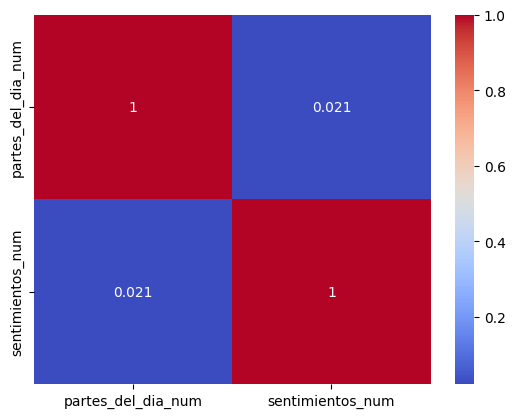

In [49]:
# Primero, necesitamos convertir las variables categóricas a numéricas para calcular la correlación
m_grande['partes_del_dia_num'] = m_grande['part_of_day'].replace({'mañana': 1, 'tarde': 2, 'noche': 3})
m_grande['sentimientos_num'] = m_grande['clas_en'].replace({'positivo': 1, 'neutral': 0, 'negativo': -1})

# Ahora, calculamos la correlación
correlacion6 = m_grande[['partes_del_dia_num', 'sentimientos_num']].corr()

print('La correlación es:')
print(correlacion6)

# Para visualizar la correlación, podemos usar un mapa de calor
sns.heatmap(correlacion6, annot=True, cmap='coolwarm')

plt.show()

La correlación es:
                  usuario_num  sentimientos_num
usuario_num           1.00000           0.01715
sentimientos_num      0.01715           1.00000


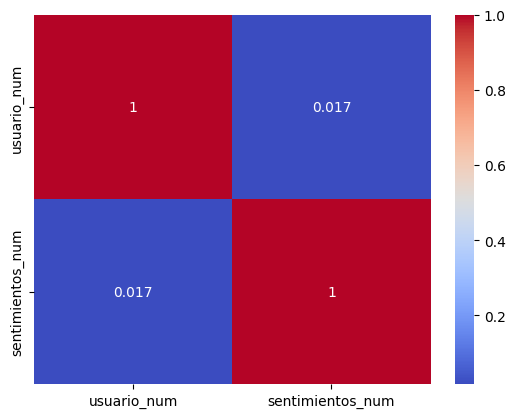

In [50]:
# Usamos factorize para convertir 'cuenta' a numérico
m_grande['usuario_num'] = pd.factorize(m_grande['usuario'])[0]

# Ahora, calculamos la correlación
correlacion7 = m_grande[['usuario_num', 'sentimientos_num']].corr()

print('La correlación es:')
print(correlacion7)

# Para visualizar la correlación, podemos usar un mapa de calor
sns.heatmap(correlacion7, annot=True, cmap='coolwarm')

plt.show()

La correlación es:
                      hora  sentimientos_num
hora              1.000000          0.017786
sentimientos_num  0.017786          1.000000


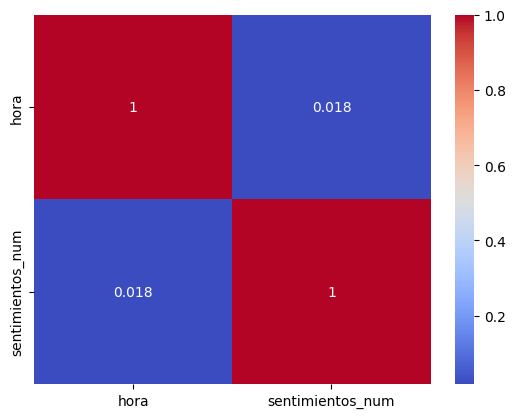

In [51]:

# Ahora, calculamos la correlación
correlacion8 = m_grande[['hora', 'sentimientos_num']].corr()

print('La correlación es:')
print(correlacion8)

# Para visualizar la correlación, podemos usar un mapa de calor
sns.heatmap(correlacion8, annot=True, cmap='coolwarm')

plt.show()

In [48]:
# Importar las bibliotecas necesarias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd


# Crear un vectorizador TF-IDF
vectorizer = TfidfVectorizer()

# Vectorizar los tweets
X = vectorizer.fit_transform(m_grande['texto_limpio'].fillna(''))

# Codificar los sentimientos como números
y = m_grande['clas_en'].replace({'positivo': 0, 'neutral': 1, 'negativo': 2})

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.80      0.68       420
           1       0.60      0.42      0.50       243
           2       0.73      0.56      0.63       337

    accuracy                           0.63      1000
   macro avg       0.64      0.59      0.60      1000
weighted avg       0.64      0.63      0.62      1000



In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

# Supongamos que  tu DataFrame y tiene dos columnas: 'hora' y 'sentimiento'


# Preprocesamiento
X = m_grande[['hora']]
y = m_grande['clas_en']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir los sentimientos en el conjunto de prueba
y_pred = model.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negativo       0.00      0.00      0.00       301
     neutral       0.00      0.00      0.00       279
    positivo       0.42      1.00      0.59       420

    accuracy                           0.42      1000
   macro avg       0.14      0.33      0.20      1000
weighted avg       0.18      0.42      0.25      1000



In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# Supongamos que df es tu DataFrame y que 'part_of_day' y 'sentimientos' son tus columnas
X = m_grande['part_of_day']
y = m_grande['clas_en']

# Codifica las etiquetas de sentimientos como números
le = LabelEncoder()
y = le.fit_transform(y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convierte las partes del día en características numéricas que el modelo puede usar
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Entrena el modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prueba el modelo
print("Precisión del modelo: ", clf.score(X_test, y_test))


Precisión del modelo:  0.42


Al intentar realizar el análisis con una muestra de más casos de observan los mismos resultados, en donde la correlación entre las variables independientes y los sentimientos es muy baja, sin embargo el modelo de parte del día mejoro ligeramente.